Coefficients:
 [8.81501918]
train mean squared error:404.18
test mean squared error:252.88
train r2:0.55
test r2:-10.66


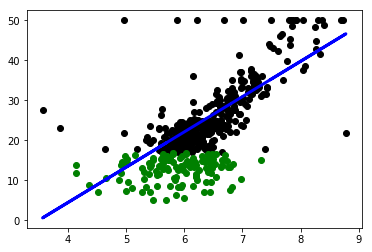

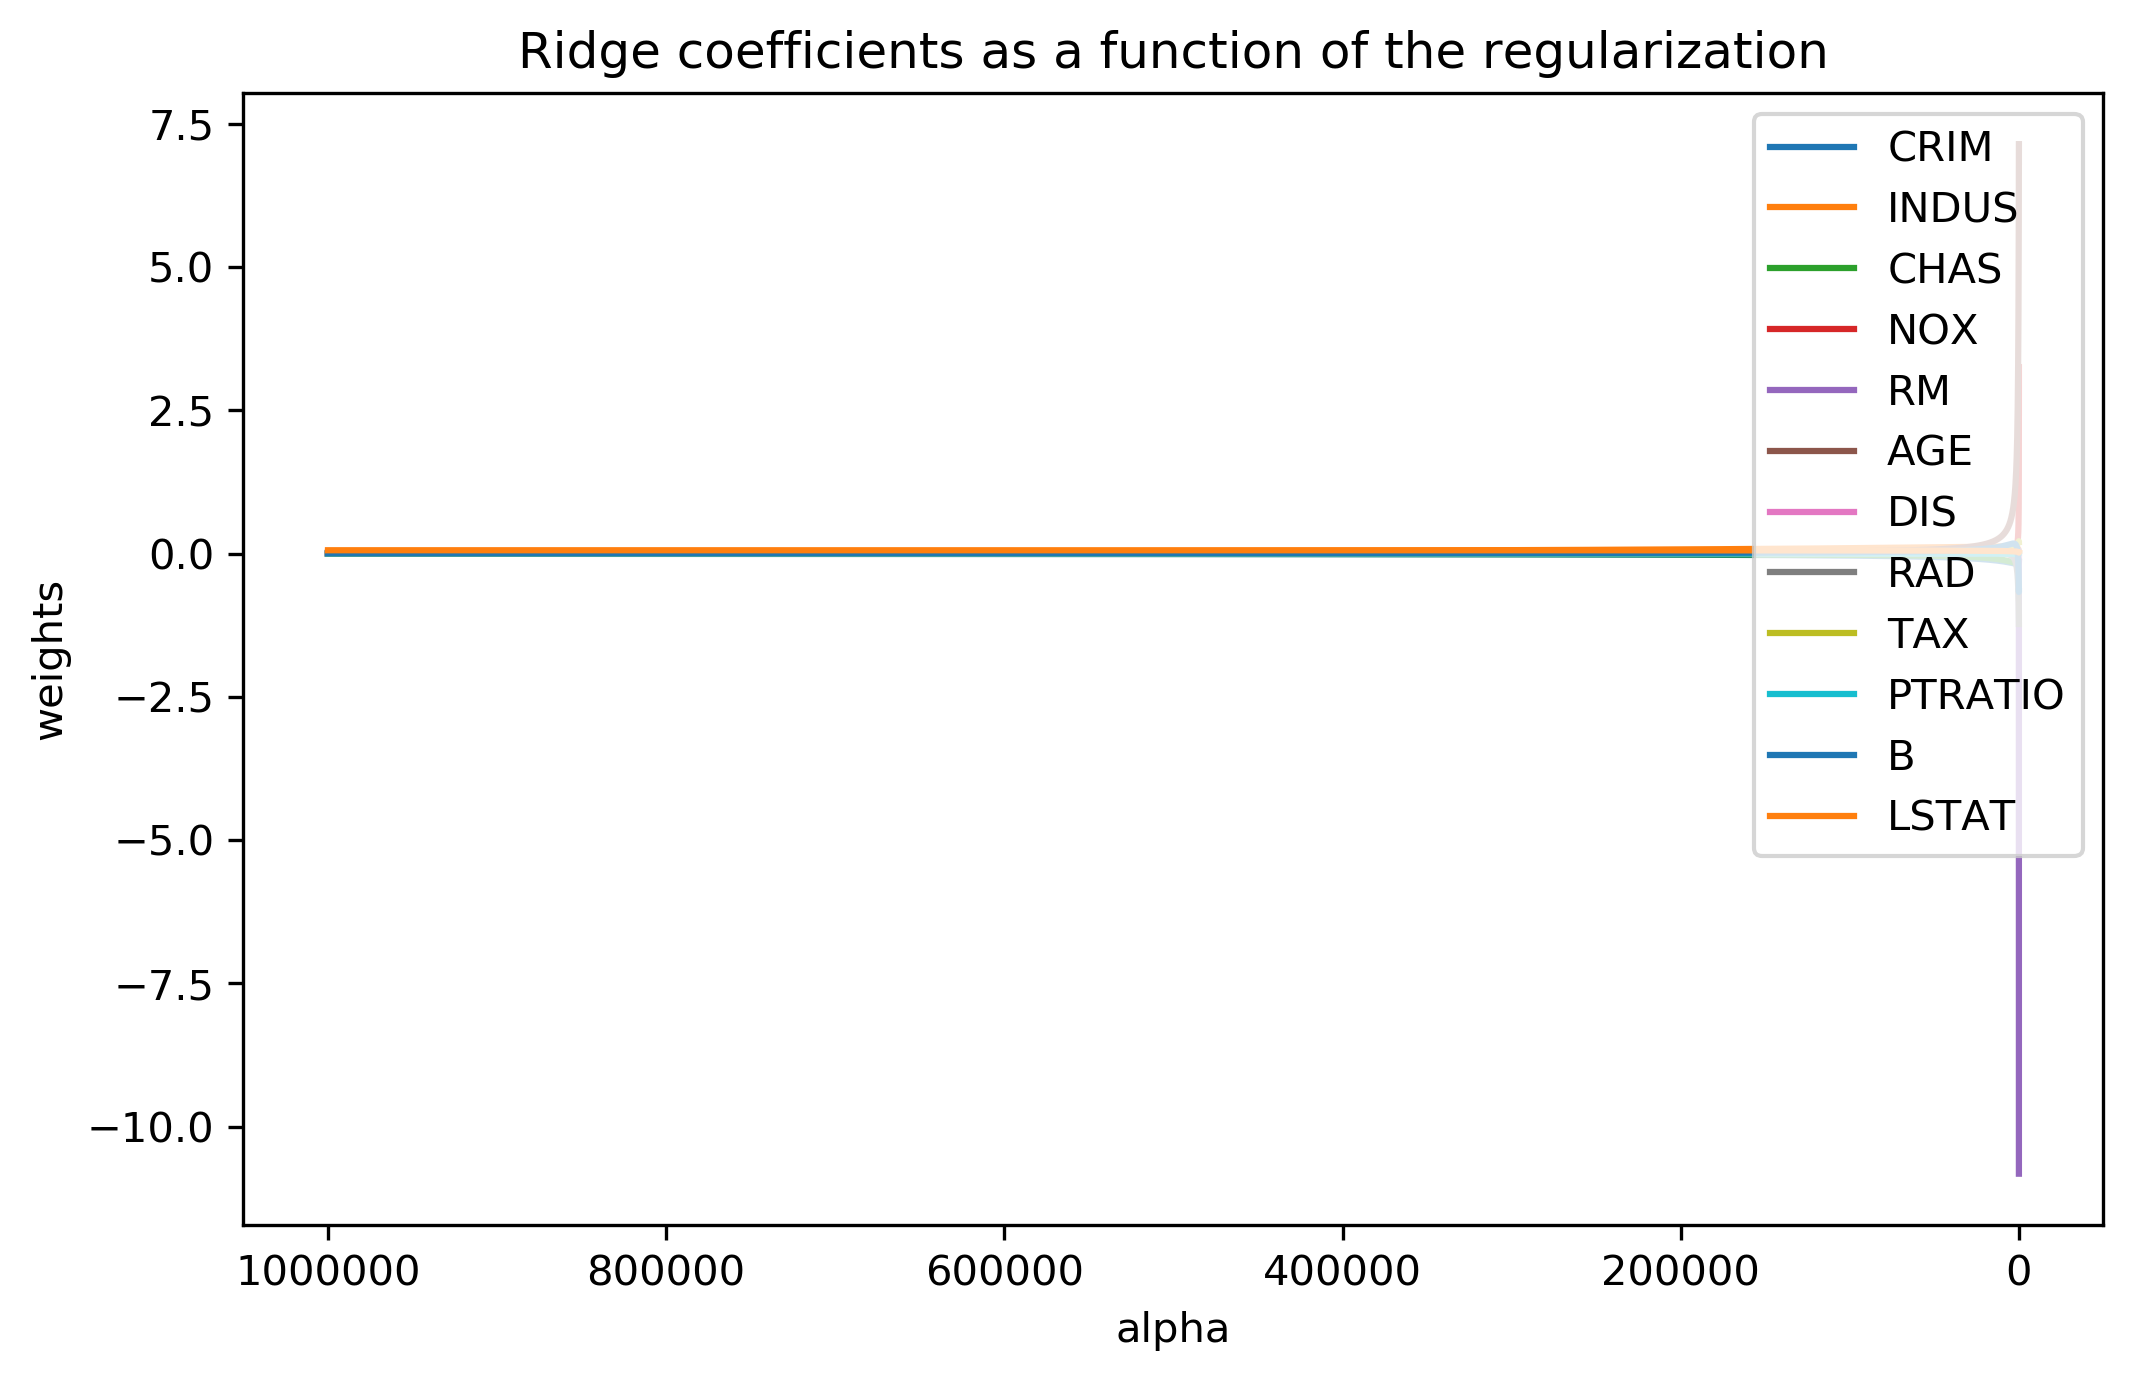

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

X=boston.data[:,0:12]
Y=boston.target[:]

n_alphas = 500
alphas = np.logspace(6,-2,n_alphas)
coefs=[]

for a in alphas:
    ridge = linear_model.Ridge(alpha=a,fit_intercept=False)
    ridge.fit(X,Y)
    coefs.append(ridge.coef_)

ax = plt.gca()


ax.plot(alphas,coefs)
ax.set_xlim(30,0)
#ax.set_xscale('log')

plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')

plt.axis('tight')

plt.legend((u'CRIM',u'INDUS',u'CHAS',u'NOX',u'RM',u'AGE',u'DIS',u'RAD',u'TAX',u'PTRATIO',u'B',u'LSTAT'),loc=1)
plt.show()

Train_data:381,Test_data:125


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


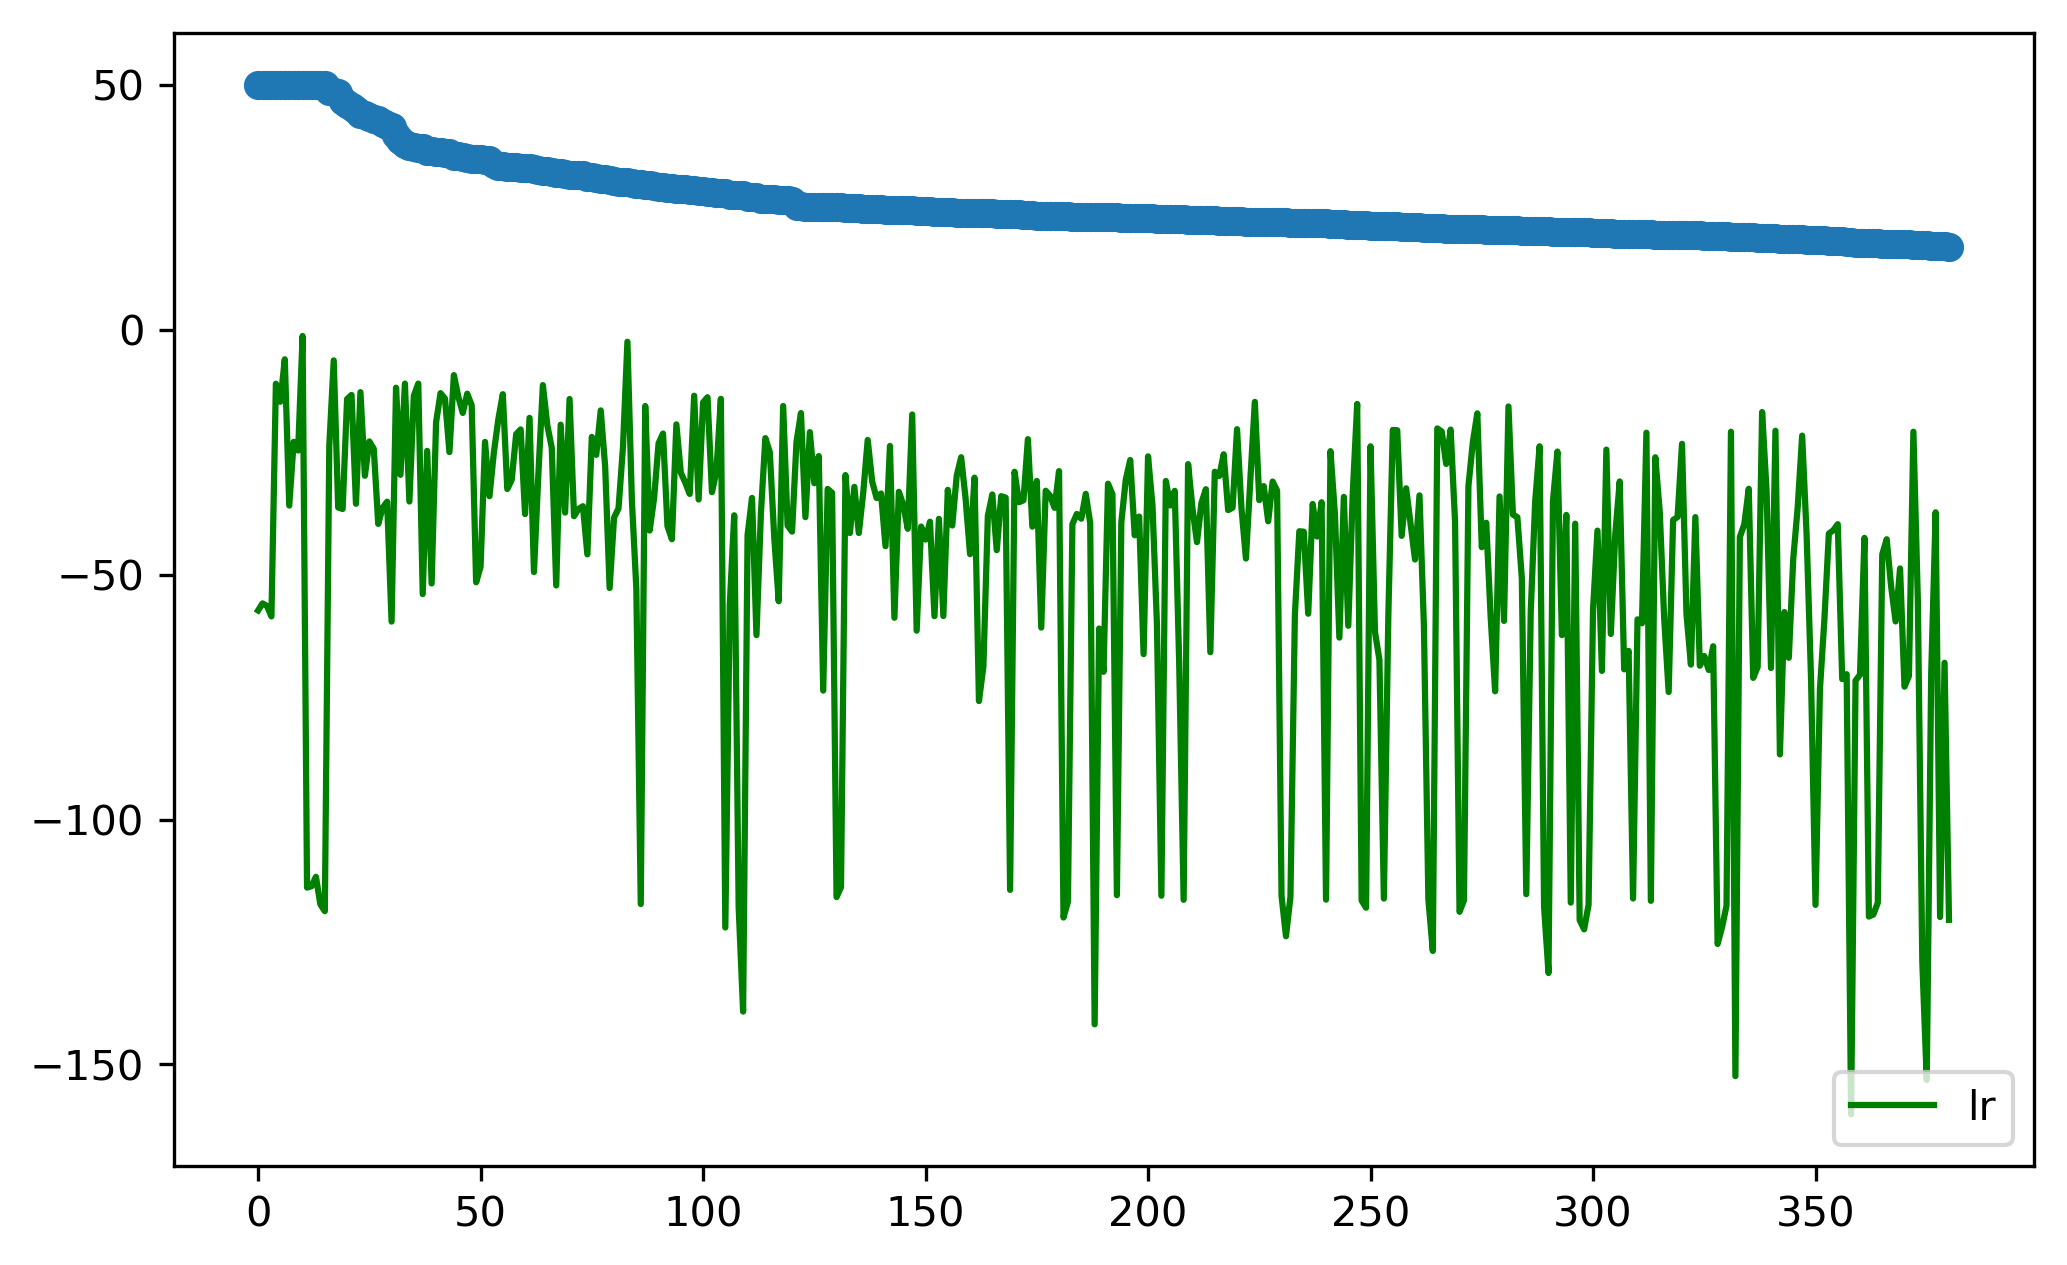

Train Data MSE：(1)LR; (2)ridge; (3)lasso
(1) 6596.815611007318
Test Data MSE：(1)LR; (2)ridge; (3)lasso
(1) 16451.574295527975
R2 score：(1)LR; (2)ridge; (3)lasso
(1) -1904.140526339142
lrの回帰係数
[array([[-0.10101708,  0.1177152 ,  0.0153352 ,  0.07419883, -0.22384803,
         0.29105647,  0.00211864, -0.33783635,  0.28974905, -0.22603168,
        -0.22427123,  0.09243223, -0.40744693]])]


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import *
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
%matplotlib inline

dataset = load_boston()

X_train, X_test, Y_train, Y_test = train_test_split(dataset.data, dataset.target)

data_x = pd.DataFrame(dataset.data,columns=dataset.feature_names)
data_y = pd.DataFrame(dataset.target,columns=['target'])

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(data_x)
y_std = sc_y.fit_transform(data_y)

print("Train_data:{0},Test_data:{1}".format(size,pro))
data_y = data_y.as_matrix().ravel()
data_x = data_x.as_matrix()

lr = LinearRegression().fit(X_std,y_std)
lasso.fit(data_x[:size],data_y[:size])
ridge.fit(data_x[:size],data_y[:size])

plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

plt.plot(lr.predict(data_x[:size]),linestyle="solid",color="green",label="lr")
#plt.plot(lasso.predict(data_x[:size]),linestyle="solid",color="red",label="lasso")
#plt.plot(ridge.predict(data_x[:size]),linestyle="solid",color="blue",label="ridge")
plt.plot(data_y[:size],marker='o',linestyle='none')
#plt.title("lr,lasso,Ridge")
plt.legend(loc="lower right")
plt.show()

#print(lr.predict(data_x[size:]))


lr_train_data = lr.predict(data_x[:size])
ridge_train_data = ridge.predict(data_x[:size])
lasso_train_data = lasso.predict(data_x[:size])
y_train_data = data_y[:size]

lr_predict_data = lr.predict(data_x[size:])
ridge_predict_data = ridge.predict(data_x[size:])
lasso_predict_data = lasso.predict(data_x[size:])
y_test_data = data_y[size:]


print("Train Data MSE：(1)LR; (2)ridge; (3)lasso")
print("(1) {0}".format(mean_squared_error(lr_train_data,y_train_data)))
#print("(2) {0}".format(mean_squared_error(ridge_train_data,y_train_data)))
#print("(3) {0}".format(mean_squared_error(lasso_train_data,y_train_data)))

print("Test Data MSE：(1)LR; (2)ridge; (3)lasso")
print("(1) {0}".format(mean_squared_error(lr_predict_data,y_test_data)))
#print("(2) {0}".format(mean_squared_error(ridge_predict_data,y_test_data)))
#print("(3) {0}".format(mean_squared_error(lasso_predict_data,y_test_data)))

print("R2 score：(1)LR; (2)ridge; (3)lasso")
print("(1) {0}".format(r2_score(y_test_data,lr_predict_data)))
#print("(2) {0}".format(r2_score(y_test_data,ridge_predict_data)))
#print("(3) {0}".format(r2_score(y_test_data,lasso_predict_data)))


print('lrの回帰係数')
print([lr.coef_])

#print('ridgeの回帰係数')
#print([ridge.coef_])
#print('lassoの回帰係数')
#print([lasso.coef_])



In [38]:
def MSE(prt,tst):
    return mean_squared_error(prt,tst)
print("ridge MSE/lr MSE:{0:.2f}%".format(MSE(ridge_predict_data,y_test_data)/MSE(lr_predict_data,y_test_data)*100))
print("lasso MSE/lr MSE:{0:.2f}%".format(MSE(lasso_predict_data,y_test_data)/MSE(lr_predict_data,y_test_data)*100))

ridge MSE/lr MSE:179.28%
lasso MSE/lr MSE:71.99%


********************************************************************
Train_data:381,Test_data:125
125
125


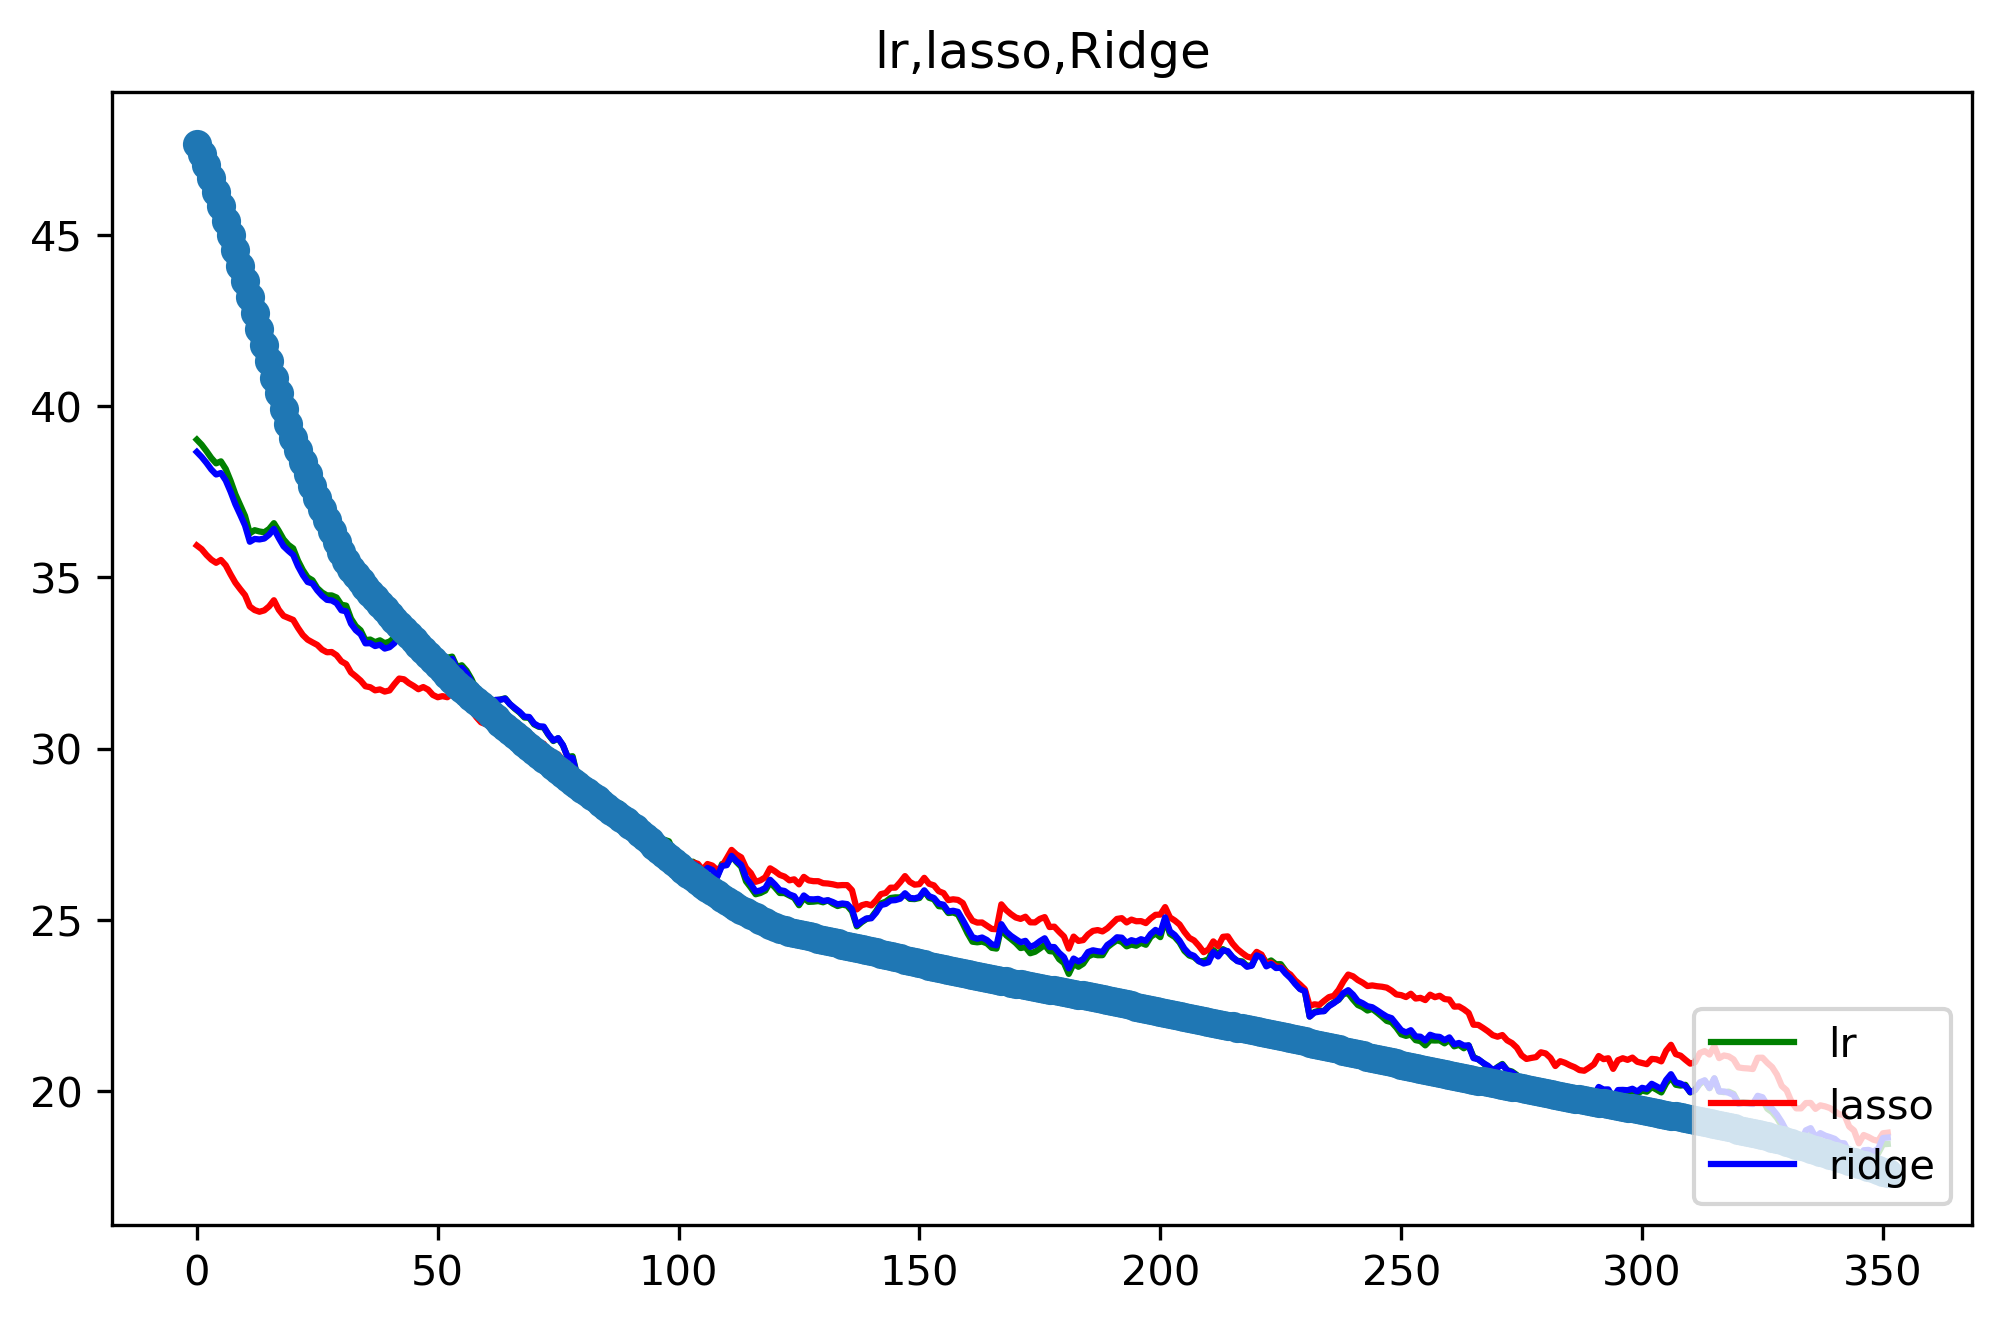

Train Data MSE：(1)LR; (2)ridge; (3)lasso
(1) 3.8688869252332365
(2) 4.189268845977403
(3) 7.987235031863153
Test Data MSE：(1)LR; (2)ridge; (3)lasso
(1) 137.314092146672
(2) 145.58159091202955
(3) 57.389191236402866
R2 score：(1)LR; (2)ridge; (3)lasso
(1) -14.901374366172575
(2) -15.85877495692473
(3) -5.645836564590574
ridgeの回帰係数
[array([ 4.63192304e-01,  4.15328229e-02, -5.45923752e-02,  1.62923696e+00,
       -9.79963549e-01,  4.72290291e+00, -1.01593137e-02, -1.16888062e+00,
        2.77432227e-01, -1.52340991e-02, -6.91096142e-01, -6.00397945e-04,
       -6.08581011e-01])]
lassoの回帰係数
[array([ 0.09027155,  0.04607397, -0.        ,  0.        , -0.        ,
        2.13574675,  0.023124  , -0.76184849,  0.35344769, -0.01607175,
       -0.65215971, -0.00434766, -0.80382401])]


In [87]:
import pandas as pd
from scipy.interpolate import spline
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import *
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
%matplotlib inline

dataset = load_boston()

data_x = pd.DataFrame(dataset.data,columns=dataset.feature_names)
data_y = pd.DataFrame(dataset.target,columns=['target'])


def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    #print(a.strides)
    #print(a.shape[:-1])
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)


print("********************************************************************")

#mean = data_x.mean(axis=0)
#data_x -= mean
#std = data_x.std(axis=0)
#data_x /= std
#print(data_x)

pro = 125
size = len(data_x.index) - pro

print("Train_data:{0},Test_data:{1}".format(size,pro))
data_y = data_y.values.ravel()
data_x = data_x.values


lr = LinearRegression(normalize=True)
lasso = Lasso()
ridge = Ridge(alpha = 10)


lr.fit(data_x[:size],data_y[:size])
lasso.fit(data_x[:size],data_y[:size])
ridge.fit(data_x[:size],data_y[:size])


lr_train_data = lr.predict(data_x[:size])
ridge_train_data = ridge.predict(data_x[:size])
lasso_train_data = lasso.predict(data_x[:size])
y_train_data = data_y[:size]



lr_train_data = np.mean(rolling_window(lr_train_data,30),-1)
ridge_train_data = np.mean(rolling_window(ridge_train_data,30),-1)
lasso_train_data = np.mean(rolling_window(lasso_train_data,30),-1)
y_train_data = np.mean(rolling_window(y_train_data,30),-1)


lr_predict_data = np.mean(rolling_window(lr_train_data,10),-1)
ridge_predict_data = np.mean(rolling_window(ridge_train_data,10),-1)
lasso_predict_data = np.mean(rolling_window(lasso_train_data,10),-1)
y_test_data = np.mean(rolling_window(y_train_data,10),-1)


plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300



############

##########################


lr_predict_data = lr.predict(data_x[size:])
ridge_predict_data = ridge.predict(data_x[size:])
lasso_predict_data = lasso.predict(data_x[size:])
y_test_data = data_y[size:]



print(len(y_test_data))
print(len(ridge_predict_data))

plt.plot(lr_train_data,linestyle="solid",color="green",label="lr")
plt.plot(lasso_train_data,linestyle="solid",color="red",label="lasso")
plt.plot(ridge_train_data,linestyle="solid",color="blue",label="ridge")
plt.plot(y_train_data,marker='o',linestyle='none')
plt.title("lr,lasso,Ridge")
plt.legend(loc="lower right")
plt.show()


print("Train Data MSE：(1)LR; (2)ridge; (3)lasso")
print("(1) {0}".format(mean_squared_error(lr_train_data,y_train_data)))
print("(2) {0}".format(mean_squared_error(ridge_train_data,y_train_data)))
print("(3) {0}".format(mean_squared_error(lasso_train_data,y_train_data)))

print("Test Data MSE：(1)LR; (2)ridge; (3)lasso")
print("(1) {0}".format(mean_squared_error(lr_predict_data,y_test_data)))
print("(2) {0}".format(mean_squared_error(ridge_predict_data,y_test_data)))
print("(3) {0}".format(mean_squared_error(lasso_predict_data,y_test_data)))

print("R2 score：(1)LR; (2)ridge; (3)lasso")
print("(1) {0}".format(r2_score(y_test_data,lr_predict_data)))
print("(2) {0}".format(r2_score(y_test_data,ridge_predict_data)))
print("(3) {0}".format(r2_score(y_test_data,lasso_predict_data)))

print('ridgeの回帰係数')
print([ridge.coef_])
print('lassoの回帰係数')
print([lasso.coef_])

